In [ ]:
import marimo as mo
import pandas as pd
from czitools.metadata_tools import czi_metadata as czimd
from czitools.utils import misc
from czitools.read_tools import read_tools as czird
import dask.array as da
from pathlib import Path
import os
import glob
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
file_browser = mo.ui.file_browser(multiple=False)

# Display the file browser
mo.vstack([file_browser])

In [ ]:
filepath = str(file_browser.path(0))
print(f"Filepath: {filepath}")

Filepath: F:\Github\czitools\data\CellDivision_T10_Z15_CH2_DCV_small.czi


In [ ]:
def hex_to_rgb(hex_color: str) -> tuple[int, int, int]:
    """
    Convert a hexadecimal color string to an RGB tuple.
    Args:
        hex_color (str): A string representing a color in hexadecimal format (e.g., "#RRGGBB").
    Returns:
        tuple[int, int, int]: A tuple containing the RGB values as floats in the range [0, 1].
    """

    hex_color = hex_color.lstrip("#")
    rgb = tuple(int(hex_color[i : i + 2], 16) / 255.0 for i in (0, 2, 4))

    return rgb

# get 6d array with dimension order STCZYX(A)
array6d, mdata = czird.read_6darray(filepath, use_dask=False, chunk_zyx=True)

# show dask array structure
if isinstance(array6d, da.Array):
    print(array6d)
else:
    print("Shape:", array6d.shape, "dtype:", array6d.dtype)

# get array dimensions
dims = array6d.shape[:-2]
dims_names = ["S", "T", "C", "Z"]

cmaps = []

for ch in range(mdata.image.SizeC):
    chname = mdata.channelinfo.names[ch]
    rgb = hex_to_rgb(mdata.channelinfo.colors[ch][3:])
    cmaps.append(LinearSegmentedColormap.from_list(chname, [(0, 0, 0), rgb]))

Reading sublocks planes: 1 2Dplanes [00:00, 499.98 2Dplanes/s]
Reading 2D planes: 0 2Dplanes [00:00, ? 2Dplanes/s]

Reading 2D planes: 300 2Dplanes [00:00, 7333.81 2Dplanes/s]


Shape: (1, 10, 2, 15, 256, 256) dtype: uint16


In [ ]:
scene = mo.ui.slider(
    start=0,
    stop=dims[0] - 1,
    step=1,
    label=f"scene [0 - {dims[0]-1}]",
    show_value=True,
)

time = mo.ui.slider(
    start=0,
    stop=dims[1] - 1,
    step=1,
    label=f"time [0 - {dims[1]-1}]",
    show_value=True,
)

channel = mo.ui.slider(
    start=0,
    stop=dims[2] - 1,
    step=1,
    label=f"channel [0 - {dims[2]-1}]",
    show_value=True,
)

zplane = mo.ui.slider(
    start=0,
    stop=dims[3] - 1,
    step=1,
    label=f"zplane [0 - {dims[3]-1}]",
    show_value=True,
)

mo.vstack([scene, time, channel, zplane])

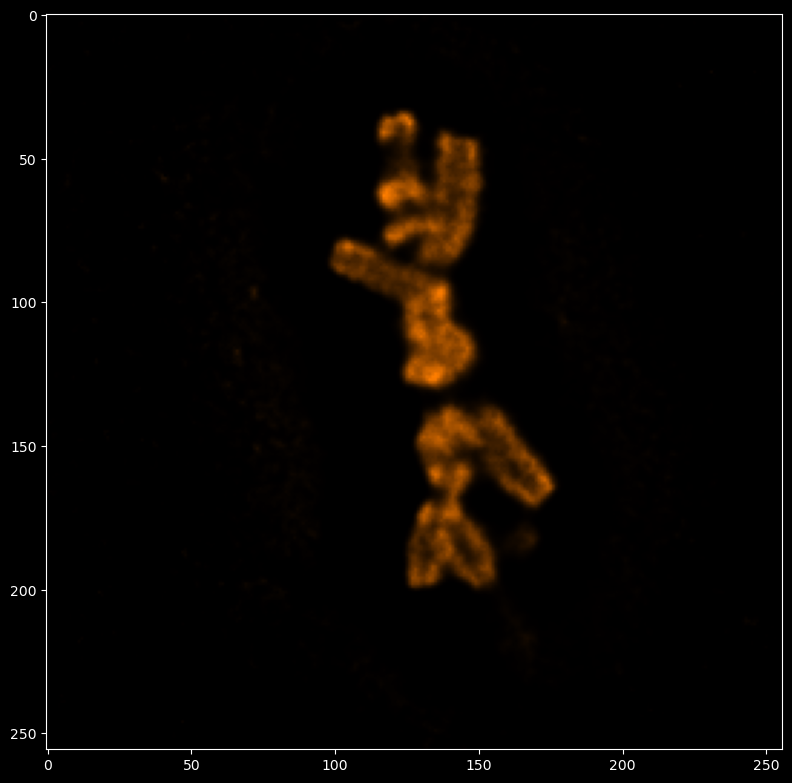

In [ ]:
show_2dplane(scene.value, time.value, channel.value, zplane.value)

In [ ]:
def show_2dplane(s, t, c, z):
    plt.figure(figsize=(8, 8))
    plt.imshow(array6d[s, t, c, z, ...], cmap=cmaps[c], vmin=None, vmax=None)
    plt.tight_layout()
    return plt.gca()